In [2]:
import pandas as pd
import numpy as np

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#data = uploaded

In [5]:
#type(data)

In [6]:
df = pd.read_csv('brain_stroke.csv')

In [7]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [8]:
df.dropna

<bound method DataFrame.dropna of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_ty

In [9]:
df.isna

<bound method DataFrame.isna of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [10]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
data = pd.get_dummies(df, columns=['work_type','Residence_type','smoking_status'])

In [12]:
df['ever_married'].value_counts()

Yes    3280
No     1701
Name: ever_married, dtype: int64

In [13]:
data = pd.get_dummies(data, columns=['ever_married'], drop_first=True)
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

In [14]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes,gender_Male
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0,1,1
1,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0,1,1
2,49.0,0,0,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1,1,0
3,79.0,1,0,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0,1,1


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['stroke']), data['stroke'], test_size=0.33)

In [16]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes,gender_Male
3901,11.0,0,0,88.79,21.3,0,0,0,1,0,1,0,0,1,0,0,0
3104,45.0,0,0,92.21,31.0,0,1,0,0,1,0,0,0,1,0,1,0
2698,46.0,0,0,111.78,39.4,0,1,0,0,1,0,0,0,0,1,1,1
4530,30.0,0,0,84.92,47.8,0,1,0,0,0,1,0,0,1,0,1,0
4629,23.0,0,0,132.88,24.9,0,1,0,0,0,1,0,0,1,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler
# changes mean to 0 and variance to 1 across all data
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[-1.40976819, -0.32285539, -0.24433889, ..., -0.42719397,
        -1.36632298, -0.84806656],
       [ 0.08773412, -0.32285539, -0.24433889, ..., -0.42719397,
         0.73189137, -0.84806656],
       [ 0.1317783 , -0.32285539, -0.24433889, ...,  2.34085703,
         0.73189137,  1.17915272],
       ...,
       [-1.54190075, -0.32285539, -0.24433889, ..., -0.42719397,
        -1.36632298, -0.84806656],
       [ 0.92457364,  3.09736191, -0.24433889, ..., -0.42719397,
         0.73189137, -0.84806656],
       [ 0.21986667, -0.32285539, -0.24433889, ..., -0.42719397,
         0.73189137,  1.17915272]])

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 
ab = model.fit(X_train, y_train)

In [20]:
model.score(X_train, y_train)
model.score(X_test, y_test)

0.9458637469586375

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_test)

In [22]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3178
           1       1.00      0.01      0.01       159

    accuracy                           0.95      3337
   macro avg       0.98      0.50      0.49      3337
weighted avg       0.95      0.95      0.93      3337



In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1555
           1       0.00      0.00      0.00        89

    accuracy                           0.95      1644
   macro avg       0.47      0.50      0.49      1644
weighted avg       0.89      0.95      0.92      1644



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [25]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 3178
After OverSampling, counts of label '0': 3178


In [26]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1555
           1       0.14      0.81      0.25        89

    accuracy                           0.73      1644
   macro avg       0.56      0.77      0.54      1644
weighted avg       0.94      0.73      0.80      1644



In [27]:
lr1.score(X_test,y_test)

0.7305352798053528

In [28]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())

In [29]:
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, counts of label '1': 159
After Undersampling, counts of label '0': 159


In [30]:
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.40      0.57      1555
           1       0.06      0.67      0.11        89

    accuracy                           0.42      1644
   macro avg       0.51      0.54      0.34      1644
weighted avg       0.91      0.42      0.54      1644



In [31]:
#retraining the smote data on lr2 where the acc for '1' is high
lr2.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [32]:
predictions = lr2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      1555
           1       0.14      0.81      0.25        89

    accuracy                           0.73      1644
   macro avg       0.56      0.77      0.54      1644
weighted avg       0.94      0.73      0.80      1644



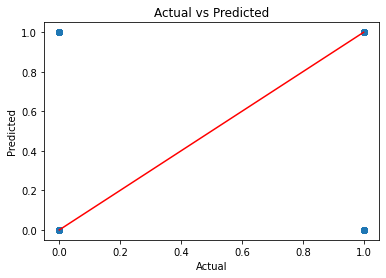

In [33]:
# get a different graph !!!

import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)

x = [0, 1]
y = [0, 1]
plt.plot(x, y, color='red')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

plt.show()

In [34]:
import tensorflow as tf

In [35]:
N, D = X_train.shape

In [36]:
#logistic regression
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
r = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100)

Epoch 1/100
105/105 [==============================] - 1s 4ms/step - loss: 0.7529 - accuracy: 0.5859 - val_loss: 0.6955 - val_accuracy: 0.5870
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.6104 - val_loss: 0.6306 - val_accuracy: 0.6247
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.6069 - accuracy: 0.6656 - val_loss: 0.5830 - val_accuracy: 0.6916
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7438 - val_loss: 0.5435 - val_accuracy: 0.7865
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.8130 - val_loss: 0.5088 - val_accuracy: 0.8443
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.8523 - val_loss: 0.4777 - val_accuracy: 0.8838
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.8888 - val_loss: 0.4498 - val_accuracy: 0.9112

In [39]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

105/105 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9527
Train score: [0.1545735001564026, 0.952652096748352]
52/52 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9459
Test score: [0.1679123342037201, 0.9458637237548828]


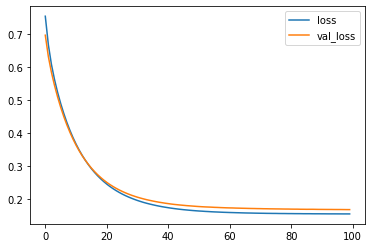

In [40]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

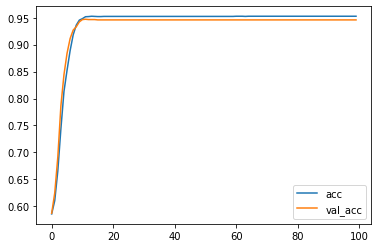

In [41]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

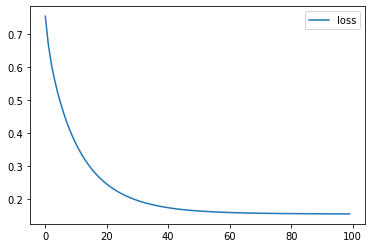

In [42]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [43]:
model.layers

In [44]:
model.layers[0].get_weights()

[array([[ 1.253717  ],
        [ 0.14665829],
        [ 0.11951591],
        [ 0.18245605],
        [-0.04536796],
        [-0.22037677],
        [-0.28413728],
        [-0.28829494],
        [-0.00624122],
        [ 0.36210662],
        [ 0.3512481 ],
        [ 0.21822192],
        [ 0.24349956],
        [ 0.14612423],
        [ 0.26711333],
        [-0.01549701],
        [ 0.0353694 ]], dtype=float32), array([-3.6534743], dtype=float32)]

In [45]:
#saving the model
model.save('stroke_prediction.h5')

In [46]:
!ls -lh

total 304K
-rw-r--r-- 1 root root 279K Jan 29 12:20 brain_stroke.csv
drwxr-xr-x 1 root root 4.0K Jan 26 14:33 sample_data
-rw-r--r-- 1 root root  19K Jan 29 12:21 stroke_prediction.h5


In [47]:
new = tf.keras.models.load_model('stroke_prediction.h5')
print(new.layers)
new.evaluate(X_test,y_test)

52/52 [==============================] - 0s 1ms/step - loss: 0.1679 - accuracy: 0.9459


[0.1679123342037201, 0.9458637237548828]

In [48]:
#y_pred=new.predict(X_test).flatten()
out=pd.DataFrame({'actual':y_test,'predicted':predictions})
out=data.copy().merge(out,left_index=True,right_index=True)
out[['age','actual','predicted']].sample(20)
#out[out['actual']==1][['age','actual','predicted']].sample(20)

,age,actual,predicted
1895,64.0,0,0
1478,47.0,0,0
271,61.0,0,0
1736,25.0,0,0
3858,47.0,0,0
4939,52.0,0,0
2829,22.0,0,0
4059,61.0,0,0
3658,35.0,0,0
2408,79.0,0,1


In [49]:
import matplotlib.pyplot as plt 

In [50]:
#gra = out.sample(10).sort_values(by='actual')
#plt.plot(gra['actual'])
#plt.plot(gra['predicted'])
#plt.title('Accuracy')
#plt.ylabel('Time t')
#plt.xlabel('epoch')
#plt.legend()
#plt.show()

In [51]:
#representing 

In [53]:
data.drop(columns=['stroke']).to_numpy()[0]

array([ 67.  ,   0.  ,   1.  , 228.69,  36.6 ,   0.  ,   1.  ,   0.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,
         1.  ])